# Best Models for Heart Stroke Prediction

Tyson Ditner | 230147201 | ditner@unbc.ca

Noah Stobbe | 230140171 | stobbe@unbc.ca

CPSC499 - Applied Machine Learning

## References

1. Aurélien Géron, "Hands-On Machine Learning with Scikit-Learn & TensorFlow".

2. https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
#from google.colab import files, drive
#import gdown

# Upload a kaggle.json
#files.upload()

from warnings import catch_warnings
file_id = '1DrXop-XopWp_7HxfSDa-lV19iBVBsVVc' # '1CemmlVVZkHVf3Gufln6dFCWeoZ6ZDr0i'

# URL for downloading the file from Google Drive
url = f'https://drive.google.com/file/d/{file_id}' # f'https://drive.google.com/uc?id={file_id}'

# Path to save the downloaded file
file_path = '/content/drive/MyDrive/heart-disease-dataset.zip'
folder_path = '/content/drive'

# Create the path
try:
    os.mkdir(folder_path)
    os.mkdir(folder_path + '/MyDrive')
except OSError as error:
    print(error)

# Download the file
gdown.download(url, file_path, quiet=False)
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

raw_data = pd.read_csv(file_path)

"""
dataset = 'heart-disease-dataset'
!rm -r $dataset

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

"""
!kaggle datasets download -d mirzahasnine/heart-disease-dataset
"""

"""
import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
"""

In [253]:
raw_data = pd.read_csv("data/heart_disease.csv", sep=',')

In [254]:
raw_data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


'education' does not seem like a relevant heart disease predictor. We will drop this column.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='cigsPerDay', ylabel='age'>,
        <Axes: xlabel='totChol', ylabel='age'>,
        <Axes: xlabel='heartRate', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='cigsPerDay'>,
        <Axes: xlabel='cigsPerDay', ylabel='cigsPerDay'>,
        <Axes: xlabel='totChol', ylabel='cigsPerDay'>,
        <Axes: xlabel='heartRate', ylabel='cigsPerDay'>],
       [<Axes: xlabel='age', ylabel='totChol'>,
        <Axes: xlabel='cigsPerDay', ylabel='totChol'>,
        <Axes: xlabel='totChol', ylabel='totChol'>,
        <Axes: xlabel='heartRate', ylabel='totChol'>],
       [<Axes: xlabel='age', ylabel='heartRate'>,
        <Axes: xlabel='cigsPerDay', ylabel='heartRate'>,
        <Axes: xlabel='totChol', ylabel='heartRate'>,
        <Axes: xlabel='heartRate', ylabel='heartRate'>]], dtype=object)

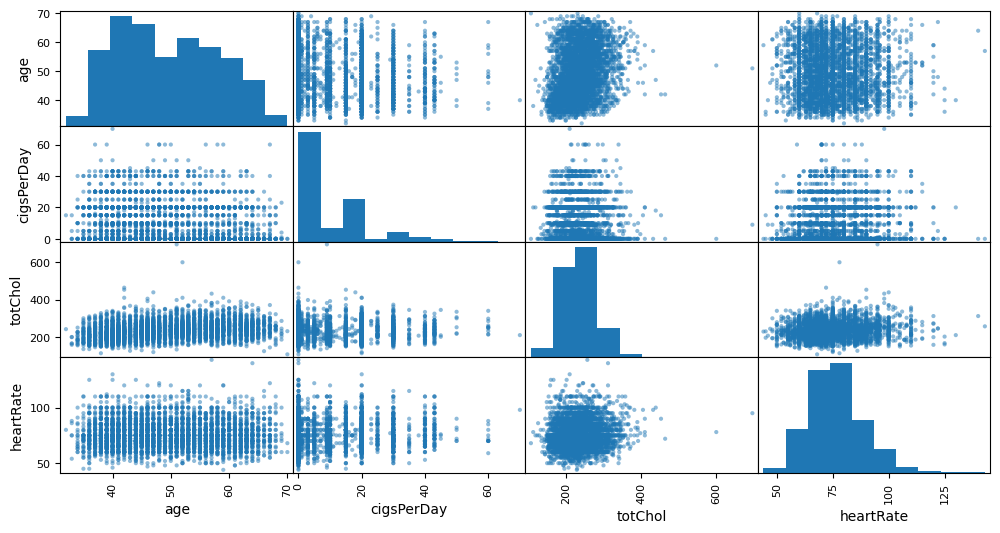

In [255]:
from pandas.plotting import scatter_matrix
attributes_scatter = ["age", "cigsPerDay", "totChol", "heartRate"]
scatter_matrix(raw_data[attributes_scatter], figsize=(12, 6))

Check for null values

In [256]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' contain null values

In [257]:
raw_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing

In [258]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Encode non-numerical features numerically

class TransformEncoder(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    # Encode Gender and Geography as matrices with a single 1 per row
    def transform(self, X, y=None):

        one_hot_encoder = OneHotEncoder()

        # Encode "Gender"
        column_names = ["Female", "Male"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Gender']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['Female'] = X['Female'].astype('int64')
        X['Male'] = X['Male'].astype('int64')

        # Encode "prevalentStroke"
        column_names = ["!prevalentStroke", "prevalentStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['prevalentStroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['prevalentStroke'] = X['prevalentStroke'].astype('int64')
        X['!prevalentStroke'] = X['!prevalentStroke'].astype('int64')

        # Encode "Heart_ stroke"
        column_names = ["!heartStroke", "heartStroke"]
        one_hot_matrix = one_hot_encoder.fit_transform(X[['Heart_ stroke']]).toarray()
        for i in range(len(one_hot_matrix.T)):
            X[column_names[i]] = one_hot_matrix.T[i]

        X['!heartStroke'] = X['!heartStroke'].astype('int64')
        X['heartStroke'] = X['heartStroke'].astype('int64')

        return X

In [259]:
class TransformImputer(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        # Do nothing
        return self
    
    def transform(self, X, y=None):
        simpleImputer1 = SimpleImputer(strategy="mean") # Strategy: fill null values in with mean values
        simpleImputer2 = SimpleImputer(strategy="most_frequent") # Strategy: majority vote
        X["cigsPerDay"] = simpleImputer1.fit_transform(X[["cigsPerDay"]]) # Fill null 'cigsPerDay' values with mean
        X["BPMeds"] = simpleImputer1.fit_transform(X[["BPMeds"]]) # Fill null 'BPMeds' values with mean
        X["totChol"] = simpleImputer1.fit_transform(X[["totChol"]]) # Fill null 'totChol' values with mean
        X["BMI"] = simpleImputer1.fit_transform(X[["BMI"]]) # Fill null 'BMI' values with mean
        X["heartRate"] = simpleImputer1.fit_transform(X[["heartRate"]]) # Fill null 'heartRate' values with mean
        X["glucose"] = simpleImputer1.fit_transform(X[["glucose"]]) # Fill null 'glucose' values with mean
        return X

In [260]:
class TransformDropper(BaseEstimator, TransformerMixin):
    
    def __init___():
        return
    
    def fit(self, X, y=None):
        return self
    
    # Drop the specified columns (not rows, hence axis=1):
    def transform(self, X, y=None):
        return X.drop(["education", "Gender", "!heartStroke", "Heart_ stroke"], axis=1, errors="ignore")

In [261]:
from sklearn.pipeline import Pipeline

# Enable cleaning data to be accomplished with 1 command
clean_data = Pipeline([("transform_encoder", TransformEncoder()),
                       ("transform_imputer", TransformImputer()),
                       ("transform_dropper", TransformDropper())])
cleaned_data = clean_data.fit_transform(raw_data)
cleaned_data.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Female,Male,!prevalentStroke,heartStroke
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,1,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,1,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1,0,1,0


In [262]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               4238 non-null   int64  
 1   currentSmoker     4238 non-null   int64  
 2   cigsPerDay        4238 non-null   float64
 3   BPMeds            4238 non-null   float64
 4   prevalentStroke   4238 non-null   int64  
 5   prevalentHyp      4238 non-null   int64  
 6   diabetes          4238 non-null   int64  
 7   totChol           4238 non-null   float64
 8   sysBP             4238 non-null   float64
 9   diaBP             4238 non-null   float64
 10  BMI               4238 non-null   float64
 11  heartRate         4238 non-null   float64
 12  glucose           4238 non-null   float64
 13  Female            4238 non-null   int64  
 14  Male              4238 non-null   int64  
 15  !prevalentStroke  4238 non-null   int64  
 16  heartStroke       4238 non-null   int64  


<Axes: >

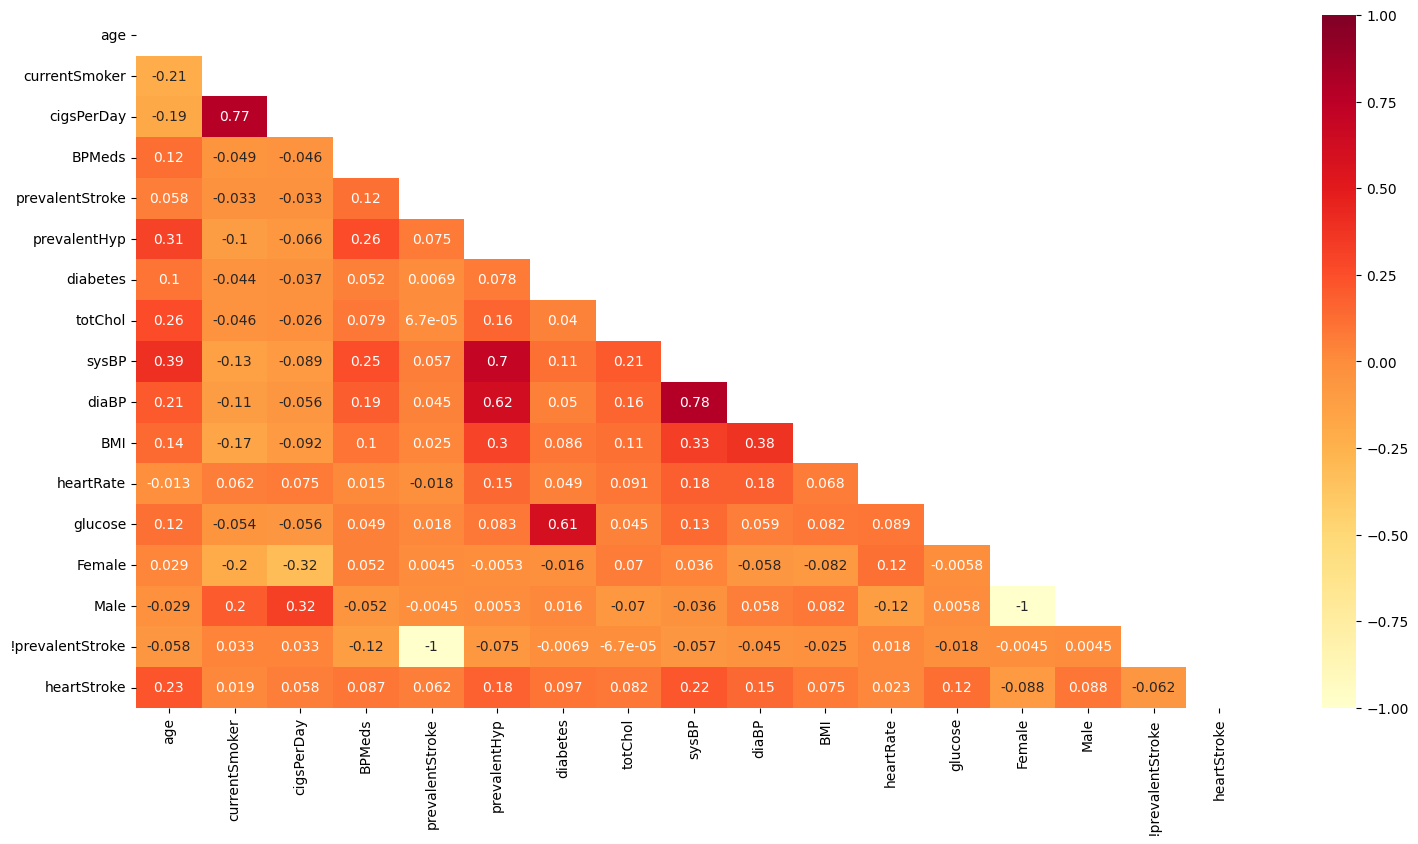

In [263]:
mask = np.triu(np.ones_like(cleaned_data.corr(numeric_only=True)))
plt.figure(figsize=(18,9))
sns.heatmap(cleaned_data.corr(numeric_only=True), cmap="YlOrRd", annot=True, mask=mask, vmin=-1, vmax=1)

## Model Building
### Split dataset

In [264]:
def get_X_y(data):

    X = data.drop(["heartStroke"], axis=1)
    y = data["heartStroke"]

    return X, y

In [265]:
# Shuffle the data before splitting to reduce chance of abnormal distribution
cleaned_data = cleaned_data.sample(frac=1, random_state=0)

X, y = get_X_y(cleaned_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [266]:
train_stats = X_train.describe() # Get the mean of training data
train_stats = train_stats.transpose()

#### Normalization

In [267]:
def scale_X_y(X, y):
    X_data = (X - train_stats['mean']) / train_stats['std']
    y_data = y

    return X_data, y_data

In [268]:
X_train, y_train = scale_X_y(X_train, y_train)
X_test, y_test = scale_X_y(X_test, y_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 1690 to 2953
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   float64
 1   currentSmoker     3390 non-null   float64
 2   cigsPerDay        3390 non-null   float64
 3   BPMeds            3390 non-null   float64
 4   prevalentStroke   3390 non-null   float64
 5   prevalentHyp      3390 non-null   float64
 6   diabetes          3390 non-null   float64
 7   totChol           3390 non-null   float64
 8   sysBP             3390 non-null   float64
 9   diaBP             3390 non-null   float64
 10  BMI               3390 non-null   float64
 11  heartRate         3390 non-null   float64
 12  glucose           3390 non-null   float64
 13  Female            3390 non-null   float64
 14  Male              3390 non-null   float64
 15  !prevalentStroke  3390 non-null   float64
dtypes: float64(16)
memory usage: 450.2 KB


## Model Implementation

In [269]:
def plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, myTitle, label=None):
    plt.plot(fpr_train, tpr_train, linewidth=2, label = "Train")
    plt.plot(fpr_test, tpr_test, linewidth=2, label = "Test")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.legend()
    plt.title(myTitle + " ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

### KNN

Bagging Classifier:

Train Accuracy: 0.8731563421828908
Test Accuracy: 0.8384433962264151
Train Precision: 0.7880794701986755
Test Precision: 0.34375
Train Recall: 0.23017408123791103
Test Recall: 0.08661417322834646
Train F1: 0.3562874251497006
Test F1: 0.13836477987421383
Train ROC Score: 0.6095179490770132
Test ROC Score: 0.5287439798180568
[[700  21]
 [116  11]]


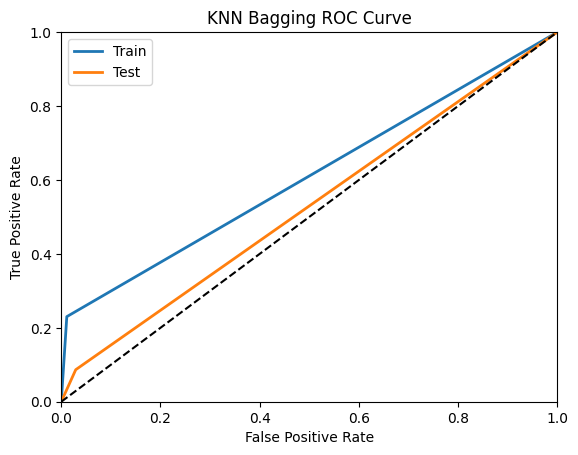

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

param_distribution_knn = [
    {'p': [0.5, 1.0, 1.5, 2.0], 'leaf_size': [20, 30, 40]}
]

knn = KNeighborsClassifier()
grid_search_knn = RandomizedSearchCV(knn, param_distribution_knn, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_knn = BaggingClassifier(estimator=grid_search_knn, random_state=0)

bag_knn.fit(X_train, y_train)
y_train_pred_knn_bag = bag_knn.predict(X_train)
y_test_pred_knn_bag = bag_knn.predict(X_test)

# Results
knn_bag_acc = metrics.accuracy_score(y_test, y_test_pred_knn_bag)
knn_bag_pre = metrics.precision_score(y_test, y_test_pred_knn_bag)
knn_bag_rec = metrics.recall_score(y_test, y_test_pred_knn_bag)
knn_bag_f1 = metrics.f1_score(y_test, y_test_pred_knn_bag)
knn_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_knn_bag)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_knn_bag))
print("Test Accuracy:", knn_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_knn_bag))
print("Test Precision:", knn_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_knn_bag))
print("Test Recall:", knn_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_knn_bag))
print("Test F1:", knn_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_knn_bag))
print("Test ROC Score:", knn_bag_roc)
print(confusion_matrix(y_test, y_test_pred_knn_bag))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_knn_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_knn_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "KNN Bagging")
plt.show()

### Logistic Regression

Bagging Classifier:

Train Accuracy: 0.8548672566371681
Test Accuracy: 0.8573113207547169
Train Precision: 0.7450980392156863
Test Precision: 0.65
Train Recall: 0.0735009671179884
Test Recall: 0.10236220472440945
Train F1: 0.13380281690140844
Test F1: 0.17687074829931973
Train ROC Score: 0.5344880401200802
Test ROC Score: 0.5463267334301659
[[714   7]
 [114  13]]

Ada Boost Classifier:

Train Accuracy: 0.8474926253687316
Test Accuracy: 0.8502358490566038
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1: 0.0
Test F1: 0.0
Train ROC Score: 0.5
Test ROC Score: 0.5
[[721   0]
 [127   0]]


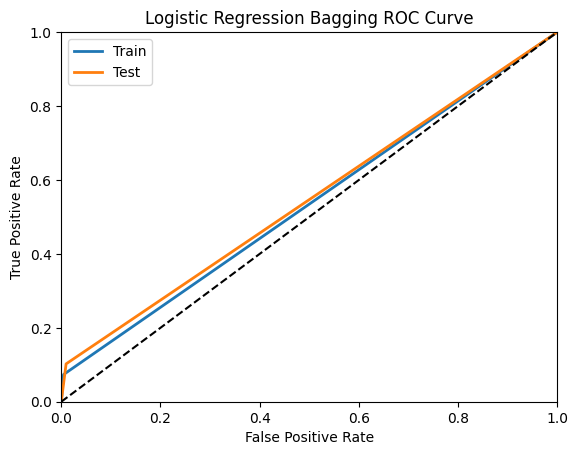

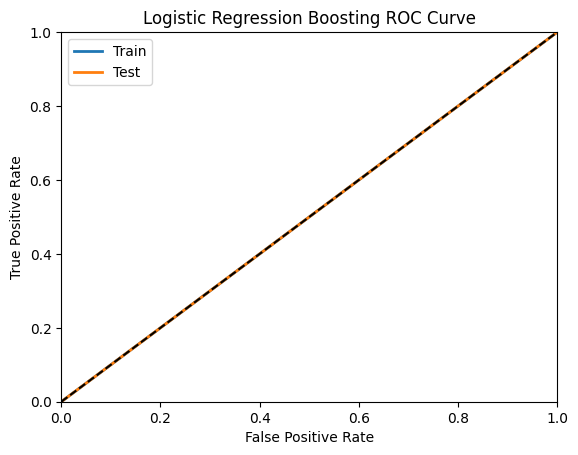

In [271]:
from sklearn.linear_model import LogisticRegression

param_distribution_logr = [
    {'C': [0.1, 1.0, 5.0, 10.0, 20.0]}
]

logr = LogisticRegression(random_state=0)
grid_search_logr = RandomizedSearchCV(logr, param_distribution_logr, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_logr = BaggingClassifier(estimator=grid_search_logr, random_state=0)

bag_logr.fit(X_train, y_train)
y_train_pred_logr_bag = bag_logr.predict(X_train)
y_test_pred_logr_bag = bag_logr.predict(X_test)

bst_logr = AdaBoostClassifier(estimator=logr, random_state=0, n_estimators=5, algorithm='SAMME')

bst_logr.fit(X_train, y_train)
y_train_pred_logr_bst = bst_logr.predict(X_train)
y_test_pred_logr_bst = bst_logr.predict(X_test)

# Results
logr_bag_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bag)
logr_bag_pre = metrics.precision_score(y_test, y_test_pred_logr_bag)
logr_bag_rec = metrics.recall_score(y_test, y_test_pred_logr_bag)
logr_bag_f1 = metrics.f1_score(y_test, y_test_pred_logr_bag)
logr_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bag)

logr_bst_acc = metrics.accuracy_score(y_test, y_test_pred_logr_bst)
logr_bst_pre = metrics.precision_score(y_test, y_test_pred_logr_bst)
logr_bst_rec = metrics.recall_score(y_test, y_test_pred_logr_bst)
logr_bst_f1 = metrics.f1_score(y_test, y_test_pred_logr_bst)
logr_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_logr_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bag))
print("Test Accuracy:", logr_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bag))
print("Test Precision:", logr_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bag))
print("Test Recall:", logr_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bag))
print("Test F1:", logr_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bag))
print("Test ROC Score:", logr_bag_roc)
print(confusion_matrix(y_test, y_test_pred_logr_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_logr_bst))
print("Test Accuracy:", logr_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_logr_bst))
print("Test Precision:", logr_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_logr_bst))
print("Test Recall:", logr_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_logr_bst))
print("Test F1:", logr_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_logr_bst))
print("Test ROC Score:", logr_bst_roc)
print(confusion_matrix(y_test, y_test_pred_logr_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Logistic Regression Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_logr_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_logr_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Logistic Regression Boosting")
plt.show()

### Naïve Bayes

Bagging Classifier:

Train Accuracy: 0.8292035398230089
Test Accuracy: 0.8313679245283019
Train Precision: 0.3697478991596639
Test Precision: 0.3620689655172414
Train Recall: 0.1702127659574468
Test Recall: 0.16535433070866143
Train F1: 0.23311258278145697
Test F1: 0.22702702702702704
Train ROC Score: 0.5590012663758692
Test ROC Score: 0.5570183581421254
[[684  37]
 [106  21]]

Ada Boost Classifier:

Train Accuracy: 0.8289085545722714
Test Accuracy: 0.8313679245283019
Train Precision: 0.36929460580912865
Test Precision: 0.36666666666666664
Train Recall: 0.172147001934236
Test Recall: 0.1732283464566929
Train F1: 0.23482849604221637
Test F1: 0.23529411764705882
Train ROC Score: 0.5596203161428924
Test ROC Score: 0.5602618847401356
[[683  38]
 [105  22]]


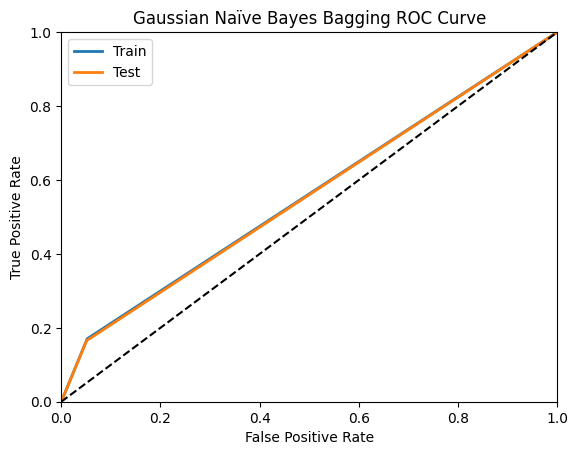

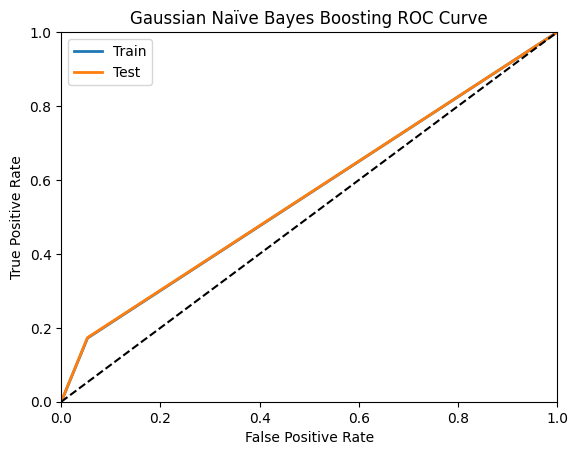

In [272]:
from sklearn.naive_bayes import GaussianNB

param_distribution_nb = [
    {'var_smoothing': [1e-10, 1e-9, 1e-8]}
]

nb = GaussianNB()
grid_search_nb = RandomizedSearchCV(nb, param_distribution_nb, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_nb = BaggingClassifier(estimator=grid_search_nb, random_state=0)

bag_nb.fit(X_train, y_train)
y_train_pred_nb_bag = bag_nb.predict(X_train)
y_test_pred_nb_bag = bag_nb.predict(X_test)

bst_nb = AdaBoostClassifier(estimator=nb, random_state=0, n_estimators=5, algorithm='SAMME')

bst_nb.fit(X_train, y_train)
y_train_pred_nb_bst = bst_nb.predict(X_train)
y_test_pred_nb_bst = bst_nb.predict(X_test)

# Results
nb_bag_acc = metrics.accuracy_score(y_test, y_test_pred_nb_bag)
nb_bag_pre = metrics.precision_score(y_test, y_test_pred_nb_bag)
nb_bag_rec = metrics.recall_score(y_test, y_test_pred_nb_bag)
nb_bag_f1 = metrics.f1_score(y_test, y_test_pred_nb_bag)
nb_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_nb_bag)

nb_bst_acc = metrics.accuracy_score(y_test, y_test_pred_nb_bst)
nb_bst_pre = metrics.precision_score(y_test, y_test_pred_nb_bst)
nb_bst_rec = metrics.recall_score(y_test, y_test_pred_nb_bst)
nb_bst_f1 = metrics.f1_score(y_test, y_test_pred_nb_bst)
nb_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_nb_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_nb_bag))
print("Test Accuracy:", nb_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_nb_bag))
print("Test Precision:", nb_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_nb_bag))
print("Test Recall:", nb_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_nb_bag))
print("Test F1:", nb_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_nb_bag))
print("Test ROC Score:", nb_bag_roc)
print(confusion_matrix(y_test, y_test_pred_nb_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_nb_bst))
print("Test Accuracy:", nb_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_nb_bst))
print("Test Precision:", nb_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_nb_bst))
print("Test Recall:", nb_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_nb_bst))
print("Test F1:", nb_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_nb_bst))
print("Test ROC Score:", nb_bst_roc)
print(confusion_matrix(y_test, y_test_pred_nb_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_nb_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_nb_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Gaussian Naïve Bayes Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_nb_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_nb_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Gaussian Naïve Bayes Boosting")
plt.show()

### Support Vector Classifier

Bagging Classifier:

Train Accuracy: 0.8861356932153392
Test Accuracy: 0.8466981132075472
Train Precision: 0.9517241379310345
Test Precision: 0.45714285714285713
Train Recall: 0.26692456479690524
Test Recall: 0.12598425196850394
Train F1: 0.4169184290030212
Test F1: 0.19753086419753085
Train ROC Score: 0.6322440436236527
Test ROC Score: 0.5498159817401466
[[702  19]
 [111  16]]

Ada Boost Classifier:

Train Accuracy: 0.8474926253687316
Test Accuracy: 0.8502358490566038
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1: 0.0
Test F1: 0.0
Train ROC Score: 0.5
Test ROC Score: 0.5
[[721   0]
 [127   0]]


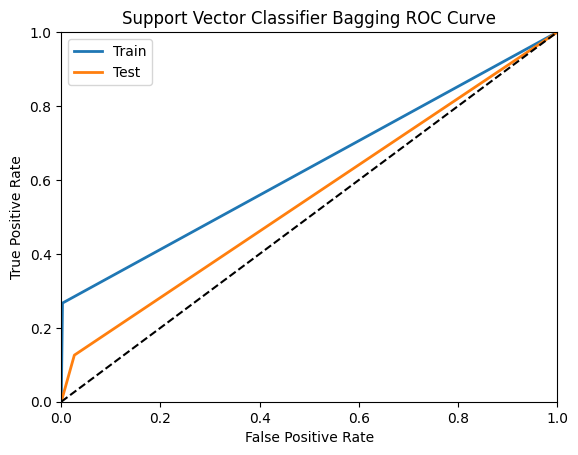

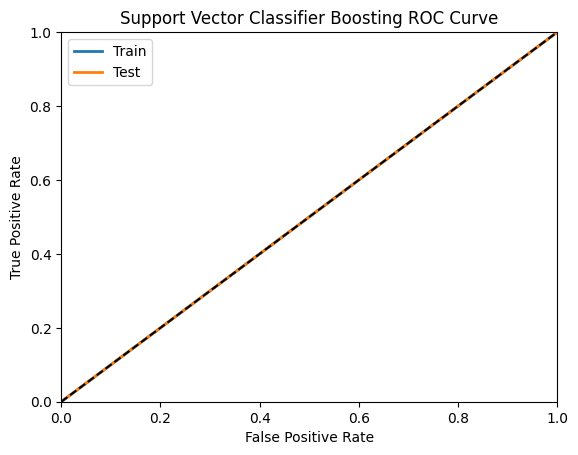

In [273]:
from sklearn.svm import SVC

param_distribution_svc = [
    {'C': [0.1, 1.0, 5.0, 10.0, 20.0]}
]

svc = SVC(random_state=0)
grid_search_svc = RandomizedSearchCV(svc, param_distribution_svc, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_svc = BaggingClassifier(estimator=grid_search_svc, random_state=0)

bag_svc.fit(X_train, y_train)
y_train_pred_svc_bag = bag_svc.predict(X_train)
y_test_pred_svc_bag = bag_svc.predict(X_test)

bst_svc = AdaBoostClassifier(estimator=svc, random_state=0, n_estimators=5, algorithm='SAMME')

bst_svc.fit(X_train, y_train)
y_train_pred_svc_bst = bst_svc.predict(X_train)
y_test_pred_svc_bst = bst_svc.predict(X_test)

# Results
svc_bag_acc = metrics.accuracy_score(y_test, y_test_pred_svc_bag)
svc_bag_pre = metrics.precision_score(y_test, y_test_pred_svc_bag)
svc_bag_rec = metrics.recall_score(y_test, y_test_pred_svc_bag)
svc_bag_f1 = metrics.f1_score(y_test, y_test_pred_svc_bag)
svc_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_svc_bag)

svc_bst_acc = metrics.accuracy_score(y_test, y_test_pred_svc_bst)
svc_bst_pre = metrics.precision_score(y_test, y_test_pred_svc_bst)
svc_bst_rec = metrics.recall_score(y_test, y_test_pred_svc_bst)
svc_bst_f1 = metrics.f1_score(y_test, y_test_pred_svc_bst)
svc_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_svc_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_svc_bag))
print("Test Accuracy:", svc_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_svc_bag))
print("Test Precision:", svc_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_svc_bag))
print("Test Recall:", svc_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_svc_bag))
print("Test F1:", svc_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_svc_bag))
print("Test ROC Score:", svc_bag_roc)
print(confusion_matrix(y_test, y_test_pred_svc_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_svc_bst))
print("Test Accuracy:", svc_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_svc_bst))
print("Test Precision:", svc_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_svc_bst))
print("Test Recall:", svc_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_svc_bst))
print("Test F1:", svc_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_svc_bst))
print("Test ROC Score:", svc_bst_roc)
print(confusion_matrix(y_test, y_test_pred_svc_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_svc_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_svc_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Support Vector Classifier Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_svc_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_svc_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Support Vector Classifier Boosting")
plt.show()

### Decision Tree Classifier

Bagging Classifier:

Train Accuracy: 0.984660766961652
Test Accuracy: 0.8360849056603774
Train Precision: 1.0
Test Precision: 0.3235294117647059
Train Recall: 0.8994197292069632
Test Recall: 0.08661417322834646
Train F1: 0.9470468431771895
Test F1: 0.13664596273291926
Train ROC Score: 0.9497098646034816
Test ROC Score: 0.5273570172660457
[[698  23]
 [116  11]]

Ada Boost Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.7275943396226415
Train Precision: 1.0
Test Precision: 0.20786516853932585
Train Recall: 1.0
Test Recall: 0.29133858267716534
Train F1: 1.0
Test F1: 0.24262295081967214
Train ROC Score: 1.0
Test ROC Score: 0.5478884314218003
[[580 141]
 [ 90  37]]


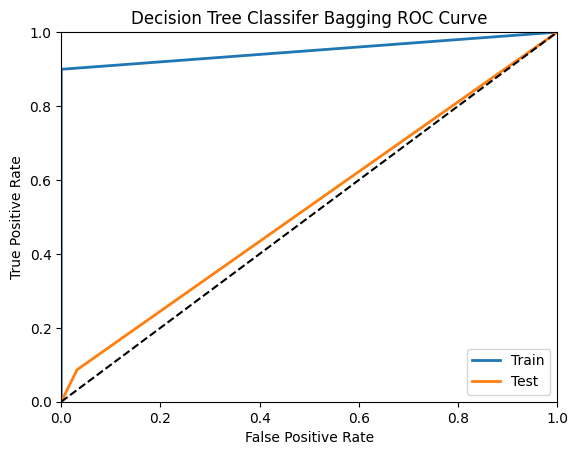

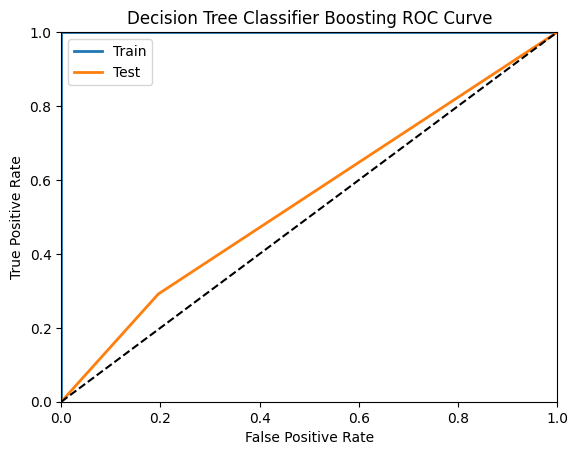

In [274]:
from sklearn.tree import DecisionTreeClassifier

param_distribution_dt = [
    {'criterion': ["gini", "entropy", "log_loss"]}
]

dt = DecisionTreeClassifier(random_state=0)
grid_search_dt = RandomizedSearchCV(dt, param_distribution_dt, n_iter=10, cv=5, scoring='f1', random_state=0)
bag_dt = BaggingClassifier(estimator=grid_search_dt, random_state=0)

bag_dt.fit(X_train, y_train)
y_train_pred_dt_bag = bag_dt.predict(X_train)
y_test_pred_dt_bag = bag_dt.predict(X_test)

bst_dt = AdaBoostClassifier(estimator=dt, random_state=0, n_estimators=5, algorithm='SAMME')

bst_dt.fit(X_train, y_train)
y_train_pred_dt_bst = bst_dt.predict(X_train)
y_test_pred_dt_bst = bst_dt.predict(X_test)

# Results
dt_bag_acc = metrics.accuracy_score(y_test, y_test_pred_dt_bag)
dt_bag_pre = metrics.precision_score(y_test, y_test_pred_dt_bag)
dt_bag_rec = metrics.recall_score(y_test, y_test_pred_dt_bag)
dt_bag_f1 = metrics.f1_score(y_test, y_test_pred_dt_bag)
dt_bag_roc = metrics.roc_auc_score(y_test, y_test_pred_dt_bag)

dt_bst_acc = metrics.accuracy_score(y_test, y_test_pred_dt_bst)
dt_bst_pre = metrics.precision_score(y_test, y_test_pred_dt_bst)
dt_bst_rec = metrics.recall_score(y_test, y_test_pred_dt_bst)
dt_bst_f1 = metrics.f1_score(y_test, y_test_pred_dt_bst)
dt_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_dt_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_dt_bag))
print("Test Accuracy:", dt_bag_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_dt_bag))
print("Test Precision:", dt_bag_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_dt_bag))
print("Test Recall:", dt_bag_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_dt_bag))
print("Test F1:", dt_bag_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_dt_bag))
print("Test ROC Score:", dt_bag_roc)
print(confusion_matrix(y_test, y_test_pred_dt_bag))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_dt_bst))
print("Test Accuracy:", dt_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_dt_bst))
print("Test Precision:", dt_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_dt_bst))
print("Test Recall:", dt_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_dt_bst))
print("Test F1:", dt_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_dt_bst))
print("Test ROC Score:", dt_bst_roc)
print(confusion_matrix(y_test, y_test_pred_dt_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_dt_bag)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_dt_bag)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Decision Tree Classifer Bagging")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_dt_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_dt_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Decision Tree Classifier Boosting")
plt.show()

### Random Forest Classifier

Bagging Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.8549528301886793
Train Precision: 1.0
Test Precision: 0.625
Train Recall: 1.0
Test Recall: 0.07874015748031496
Train F1: 1.0
Test F1: 0.13986013986013987
Train ROC Score: 1.0
Test ROC Score: 0.5352091910841242
[[715   6]
 [117  10]]

Ada Boost Classifier:

Train Accuracy: 1.0
Test Accuracy: 0.8549528301886793
Train Precision: 1.0
Test Precision: 0.6111111111111112
Train Recall: 1.0
Test Recall: 0.08661417322834646
Train F1: 1.0
Test F1: 0.15172413793103448
Train ROC Score: 1.0
Test ROC Score: 0.5384527176821344
[[714   7]
 [116  11]]


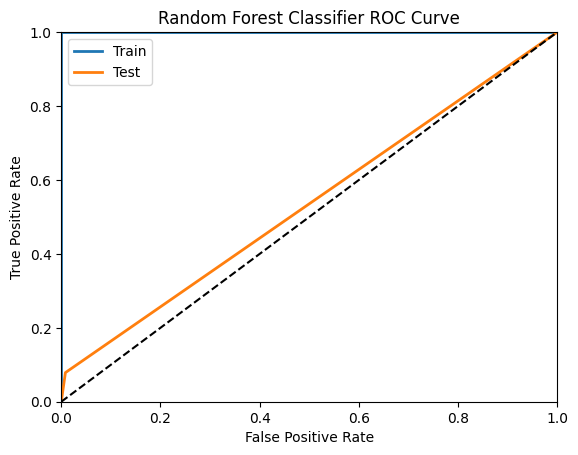

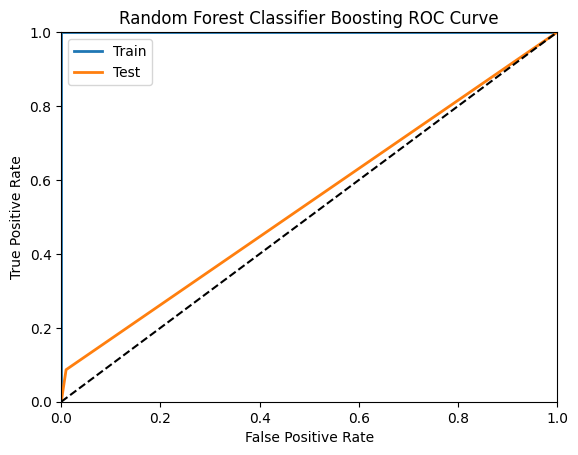

In [275]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators=1000)

rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

bst_rf = AdaBoostClassifier(estimator=rf, random_state=0, n_estimators=5, algorithm='SAMME')

bst_rf.fit(X_train, y_train)
y_train_pred_rf_bst = bst_rf.predict(X_train)
y_test_pred_rf_bst = bst_rf.predict(X_test)

# Results
rf_acc = metrics.accuracy_score(y_test, y_test_pred_rf)
rf_pre = metrics.precision_score(y_test, y_test_pred_rf)
rf_rec = metrics.recall_score(y_test, y_test_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_test_pred_rf)
rf_roc = metrics.roc_auc_score(y_test, y_test_pred_rf)

rf_bst_acc = metrics.accuracy_score(y_test, y_test_pred_rf_bst)
rf_bst_pre = metrics.precision_score(y_test, y_test_pred_rf_bst)
rf_bst_rec = metrics.recall_score(y_test, y_test_pred_rf_bst)
rf_bst_f1 = metrics.f1_score(y_test, y_test_pred_rf_bst)
rf_bst_roc = metrics.roc_auc_score(y_test, y_test_pred_rf_bst)

# Print output of results
print("Bagging Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", rf_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_rf))
print("Test Precision:", rf_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_rf))
print("Test Recall:", rf_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_rf))
print("Test F1:", rf_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_rf))
print("Test ROC Score:", rf_roc)
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nAda Boost Classifier:\n")
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred_rf_bst))
print("Test Accuracy:", rf_bst_acc)
print("Train Precision:", metrics.precision_score(y_train, y_train_pred_rf_bst))
print("Test Precision:", rf_bst_pre)
print("Train Recall:", metrics.recall_score(y_train, y_train_pred_rf_bst))
print("Test Recall:", rf_bst_rec)
print("Train F1:", metrics.f1_score(y_train, y_train_pred_rf_bst))
print("Test F1:", rf_bst_f1)
print("Train ROC Score:", metrics.roc_auc_score(y_train, y_train_pred_rf_bst))
print("Test ROC Score:", rf_bst_roc)
print(confusion_matrix(y_test, y_test_pred_rf_bst))

# Print ROC Curve

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_rf)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_rf)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Random Forest Classifier")
plt.show()

fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred_rf_bst)
fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, y_test_pred_rf_bst)

plot_roc_curve(fpr_train, fpr_test, tpr_train, tpr_test, "Random Forest Classifier Boosting")
plt.show()

0.8284603261232764
0.3763846399472616
0.18945009689922482
0.2515451200352654
0.593727527876889


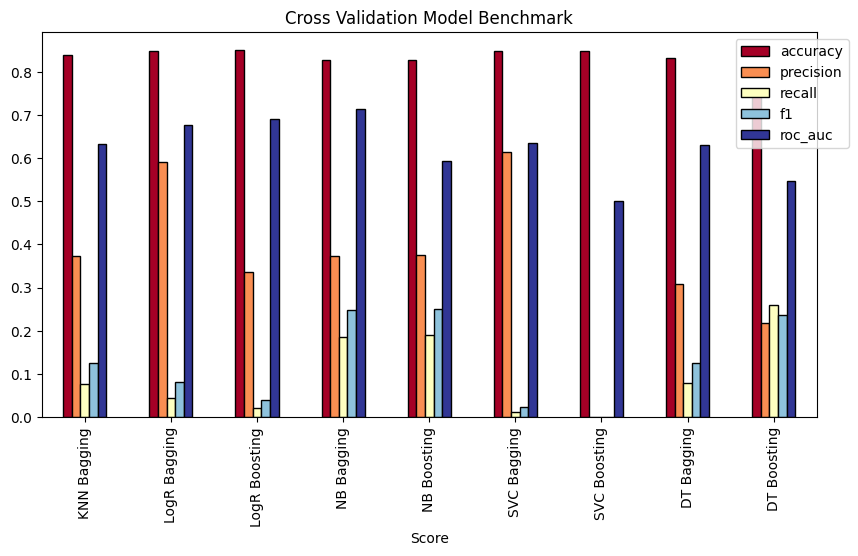

In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from functools import reduce

def plotModelScore(models, scoring):
    results = []
    names = []
    scoring = 'accuracy'

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        results.append(cv_results.mean())
        print(msg)

    plt.bar(names, results) # plots a line graph

def plot_cv_score(X, y, models, cv = 5, scoring_list = None, refit = False, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """ 
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for name, model in models:
    
        if refit:
            model.fit(X, y)
                
        for metric in scoring_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))

            if (name=='NB Boosting'):
                print(np.mean(score))
    
        tmp = pd.DataFrame({name: mean_score}, index = scoring_list)
        
        ldf.append(tmp)
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
    
    fig, ax = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(bbox_to_anchor=(1.05, 1), loc = 'upper right')
    ax.set_xlabel("Score")
    ax.set_title("Cross Validation Model Benchmark")

    if return_scores:    
        return frame_scores

models = [['KNN Bagging', bag_knn], ['LogR Bagging', bag_logr], ['LogR Boosting', bst_logr], ['NB Bagging', bag_nb], ['NB Boosting', bst_nb], 
          ['SVC Bagging', bag_svc], ['SVC Boosting', bst_svc], ['DT Bagging', bag_dt], ['DT Boosting', bst_dt]]
plot_cv_score(X, y, models, scoring_list=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])